In [1]:
%pip install pandas
%pip install matplotlib

import gc
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
input_parquet_file_path = '../data/interm/2.2_taxdata.parquet'

output_differences_output_file_path = '../data/interm/2.3_differences.csv'
output_sample_output_csv_file_path = '../data/interm/2.3_sample.csv'

# Validate the differences between the original dataset and the processed one

In [3]:
dataframe = pd.read_parquet(input_parquet_file_path)

# Filter the DataFrame for rows where the two INSEE codes differ
differences_df = dataframe[(dataframe['code INSEE'] != dataframe['Clean code INSEE']) |
                           (dataframe['code INSEE'].isna())]

# Select only the relevant columns
differences_df = differences_df[['Libellé commune', 'COMMUNE', 'DEPARTEMENT', 
                                 'DEPARTEMENT_LABEL', 'LIBELLE DEPARTEMENT', 
                                 'code INSEE', 'Clean code INSEE', 'LABEL']]

# Save the filtered DataFrame to CSV
differences_df.to_csv(output_differences_output_file_path, index=False)

In [4]:
differences_df.head()

,Libellé commune,COMMUNE,DEPARTEMENT,DEPARTEMENT_LABEL,LIBELLE DEPARTEMENT,code INSEE,Clean code INSEE,LABEL
34958,SAINT-BARTHELEMY,7,977,Saint Barthélemy,SAINT-BARTHELEMY,9777,97707,97707 - SAINT-BARTHELEMY - Saint Barthélemy
34959,SAINT-MARTIN,8,978,Saint Martin,SAINT-MARTIN,9788,97808,97808 - SAINT-MARTIN - Saint Martin
69927,SAINT-BARTHELEMY,7,977,Saint Barthélemy,SAINT-BARTHELEMY,9777,97707,97707 - SAINT-BARTHELEMY - Saint Barthélemy
69928,SAINT-MARTIN,8,978,Saint Martin,SAINT-MARTIN,9788,97808,97808 - SAINT-MARTIN - Saint Martin
69929,ABERGEMENT CLEMENCIAT,1,01,Ain,AIN,<NA>,01001,01001 - ABERGEMENT CLEMENCIAT - Ain


Total Differences: 223619


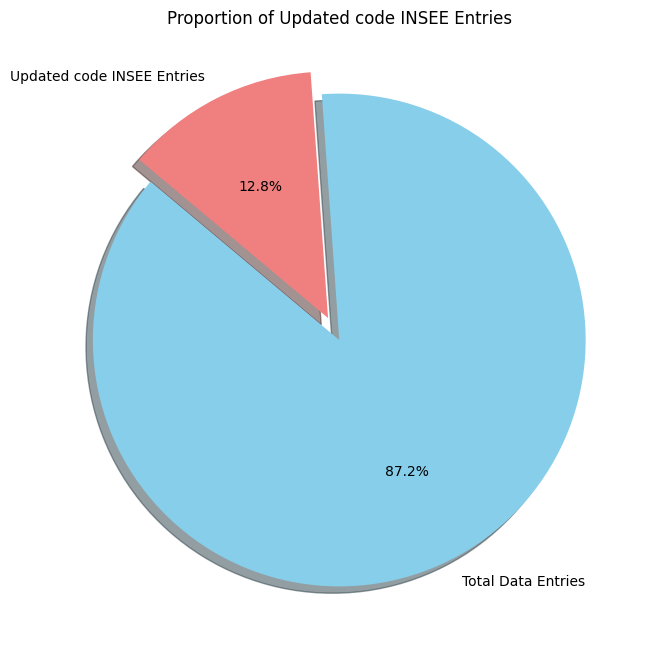

In [5]:
# Calculate the number of differences
total_entries = len(dataframe)  # Assuming 'dataframe' is the original DataFrame
updated_codes = len(differences_df)

total_differences = len(differences_df)
print(f"Total Differences: {total_differences}")

# Data for the pie chart
labels = ['Total Data Entries', 'Updated code INSEE Entries']
sizes = [total_entries, updated_codes]
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  # explode the 2nd slice

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Proportion of Updated code INSEE Entries')
plt.show()

In [6]:
# Take a random sample of the DataFrame
sample = dataframe.sample(n=1000, random_state=42)  

# Save the sampled to a new CSV file
sample.to_csv(output_sample_output_csv_file_path)

del sample
del dataframe
del differences_df
gc.collect()

0